## Visualizing the actual network between countries

In [35]:
# load data frame with transactions
import pandas as pd
import numpy as np
import pickle
import networkx as nx
from pprint import pprint
from datetime import datetime
from datetime import date 
from etl import data

df = data.df
df_ac = df.groupby('ac_location').count().sort_values('ct_id', ascending=False)
df_mc = df.groupby('mc_location').count().sort_values('ct_id', ascending=False)
df

,ct_id,date,ac_location,mc_location,name,parent_name,mc_name
6,5,2018-11-06 00:00:00,Germany,United Kingdom,12M Invent GmbH,Mr Kai Martin Seefeldt,12M Limited
7,6,2018-06-20 00:00:00,United Kingdom,Luxembourg,Northern Trust Global Services PLC,Northern Trust Global Services PLC,1889 Holdings S.A.
8,7,2014-07-01 00:00:00,Cyprus,Czech Republic,Mostreet Holdings Limited,Mostreet Holdings Limited,2R Holding s.r.o.
9,8,2017-10-13 00:00:00,Denmark,Germany,3 LG Invest ApS,3 LG Invest ApS,3 LG Invest GmbH
10,9,2014-06-20 00:00:00,Netherlands,Cyprus,Coca-Cola HBC Holdings B.V.,Coca-Cola HBC AG,3E (Cyprus) Limited
16,30,2017-10-24 00:00:00,Netherlands,United Kingdom,ABN AMRO Commercial Finance Holding B.V.,ABN AMRO Commercial Finance Holding B.V.,ABN AMRO Commercial Finance Plc
17,31,2018-03-30 00:00:00,Netherlands,Luxembourg,ABN AMRO Bank N.V.,Staat der Nederlanden,ABN AMRO Financing S.Ã r.l.
18,32,2016-10-11 00:00:00,Netherlands,Belgium,ABN AMRO Lease N.V.,Staat der Nederlanden,ABN AMRO Lease BelgiÃ« N.V.
19,5565,2019-12-17 00:00:00,Netherlands,Germany,ABN AMRO Bank N.V.,Staat der Nederlanden,Prospery GmbH
20,33,2019-01-04 00:00:00,Netherlands,Belgium,ABN AMRO Bank N.V.,ABN AMRO Bank N.V.,ABN AMRO Private Banking Belgium SA/NV


In [36]:
# extract transactions for a specific year and put them in a graph
start_date = datetime(2001, 1, 1)
end_date = datetime(2021, 1, 1)
G = data.df2graph(start_date=start_date, end_date=end_date)
G

In [41]:
s=[]
for year in range(2000,2019):
    start_date = datetime(year, 1, 1)
    end_date = datetime(year+1, 1, 1)
    G = data.df2graph(start_date=start_date, end_date=end_date)
    din =[G.in_degree(node) for node in G.nodes()]
    dout = [G.out_degree(node) for node in G.nodes()]
    s.append(sum(din)/27)
    print(year, sum(din)/27)
print(sum(s)/len(s))

2000 0.0
2001 0.037037037037037035
2002 0.0
2003 0.0
2004 0.07407407407407407
2005 0.0
2006 0.0
2007 0.37037037037037035
2008 2.111111111111111
2009 3.074074074074074
2010 3.740740740740741
2011 4.222222222222222
2012 4.7407407407407405
2013 3.5925925925925926
2014 3.4814814814814814
2015 3.4444444444444446
2016 4.296296296296297
2017 4.703703703703703
2018 4.333333333333333
2.2222222222222223


In [3]:
nx.draw(G)

C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


In [4]:
G.nodes()

NodeView(('Germany', 'Luxembourg', 'Netherlands', 'Italy', 'United Kingdom', 'France', 'Austria', 'Sweden', 'Finland', 'Cyprus', 'Belgium', 'Ireland', 'Denmark', 'Estonia', 'Norway', 'Czech Republic', 'Latvia', 'Poland', 'Spain', 'Slovakia', 'Malta', 'Romania', 'Lithuania', 'Croatia', 'Hungary', 'Bulgaria', 'Switzerland'))

In [6]:
nx.write_gexf(G, 'C:/Users/Kinga/Desktop/test2.gexf', encoding='utf-8', prettyprint=True, version='1.2draft')

In [7]:
nx.write_graphml(G, 'C:/Users/Kinga/Desktop/CBM graph.graphml', encoding='utf-8', prettyprint=True)

In [9]:
def country2int(country):
    G.nodes

In [37]:
from collections import defaultdict
import itertools
f = itertools.combinations(list(G.nodes()),2)
weights =[]
edge_data = defaultdict()
for e in f:
    edge_data[e]=0
for edge in G.edges:
    d = G.get_edge_data(*edge)
    weights.append(d['weight'])
    edge_data[edge]=d['weight']
edge_data

defaultdict(None,
            {('Germany', 'Luxembourg'): 182,
             ('Germany', 'Netherlands'): 86,
             ('Germany', 'Italy'): 17,
             ('Germany', 'United Kingdom'): 39,
             ('Germany', 'France'): 18,
             ('Germany', 'Austria'): 55,
             ('Germany', 'Sweden'): 4,
             ('Germany', 'Finland'): 3,
             ('Germany', 'Cyprus'): 5,
             ('Germany', 'Belgium'): 3,
             ('Germany', 'Ireland'): 13,
             ('Germany', 'Denmark'): 14,
             ('Germany', 'Estonia'): 0,
             ('Germany', 'Norway'): 3,
             ('Germany', 'Czech Republic'): 7,
             ('Germany', 'Latvia'): 4,
             ('Germany', 'Poland'): 3,
             ('Germany', 'Spain'): 2,
             ('Germany', 'Slovakia'): 2,
             ('Germany', 'Malta'): 3,
             ('Germany', 'Romania'): 0,
             ('Germany', 'Lithuania'): 0,
             ('Germany', 'Croatia'): 1,
             ('Germany', 'Hungary'): 2,
 

In [38]:
sorted(edge_data.items(), key = lambda x: x[1], reverse = True)

[(('United Kingdom', 'Germany'), 254),
 (('Germany', 'Luxembourg'), 182),
 (('Netherlands', 'Luxembourg'), 157),
 (('Austria', 'Germany'), 135),
 (('Netherlands', 'Germany'), 98),
 (('Germany', 'Netherlands'), 86),
 (('Luxembourg', 'Italy'), 78),
 (('Netherlands', 'Italy'), 68),
 (('Luxembourg', 'Germany'), 60),
 (('Germany', 'Austria'), 55),
 (('Luxembourg', 'Netherlands'), 54),
 (('Luxembourg', 'France'), 46),
 (('Belgium', 'Netherlands'), 41),
 (('Netherlands', 'Belgium'), 40),
 (('Germany', 'United Kingdom'), 39),
 (('France', 'Luxembourg'), 36),
 (('Italy', 'Luxembourg'), 33),
 (('Lithuania', 'Estonia'), 31),
 (('United Kingdom', 'Netherlands'), 30),
 (('Ireland', 'Italy'), 30),
 (('Netherlands', 'France'), 29),
 (('Italy', 'United Kingdom'), 29),
 (('Sweden', 'Finland'), 29),
 (('United Kingdom', 'Italy'), 29),
 (('Cyprus', 'Netherlands'), 29),
 (('Belgium', 'Germany'), 29),
 (('Netherlands', 'Cyprus'), 28),
 (('France', 'Germany'), 28),
 (('Netherlands', 'United Kingdom'), 27),


In [39]:
import pandas as pd
df = pd.read_csv('C:/Users/Kinga/OneDrive/thesis/data/Top 20 edges.csv')
df

,'United Kingdom','Germany',254;
0,'Germany','Luxembourg',182;
1,'Netherlands','Luxembourg',157;
2,'Austria','Germany',135;
3,'Netherlands','Germany',98;
4,'Germany','Netherlands',86;
5,'Luxembourg','Italy',78;
6,'Netherlands','Italy',68;
7,'Luxembourg','Germany',60;
8,'Germany','Austria',55;
9,'Luxembourg','Netherlands',54;


27 {'Germany': 'Germany', 'Luxembourg': 'Luxembourg', 'Netherlands': 'Netherlands', 'Italy': 'Italy', 'United Kingdom': 'United Kingdom', 'France': 'France', 'Austria': 'Austria', 'Sweden': 'Sweden', 'Finland': 'Finland', 'Cyprus': 'Cyprus', 'Belgium': 'Belgium', 'Ireland': 'Ireland', 'Denmark': 'Denmark', 'Estonia': 'Estonia', 'Norway': 'Norway', 'Czech Republic': 'Czech Republic', 'Latvia': 'Latvia', 'Poland': 'Poland', 'Spain': 'Spain', 'Slovakia': 'Slovakia', 'Malta': 'Malta', 'Romania': 'Romania', 'Lithuania': 'Lithuania', 'Croatia': 'Croatia', 'Hungary': 'Hungary', 'Bulgaria': 'Bulgaria', 'Switzerland': 'Switzerland'}


<IPython.core.display.Javascript object>


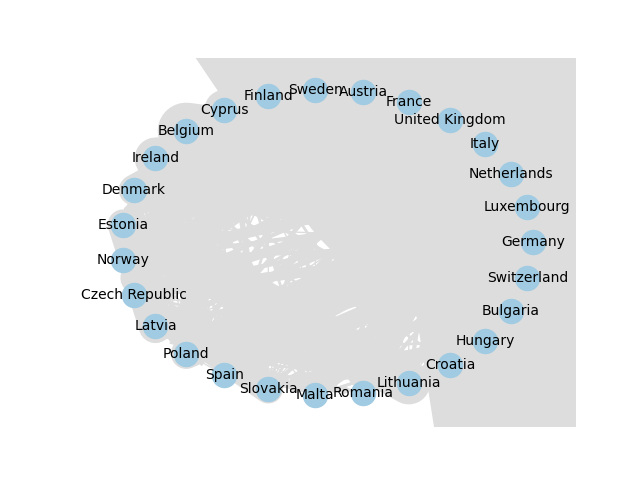

C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


In [11]:
country_names = data.countries
def visualize_graph(G):
    %matplotlib nbagg
    import matplotlib.pyplot as plt

    import networkx as nx
    
    def remove_duplicates(x):
        return list(dict.fromkeys(x))

    edges = remove_duplicates(list(G.edges()))
    m = len(edges)
    nodes = {key:key for key in list(G.nodes())}
    n = len(nodes)
    print(len(nodes), nodes)
    pos=nx.circular_layout(G) # positions for all nodes
    
    
    colors=['#DDDDDD']*m
    nx.draw_networkx_labels(G,pos,nodes,font_size=10)
    nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors, width=weights, edge_cmap=plt.cm.Blues, with_labels=False)

    plt.axis('off')
    plt.savefig("labels_and_colors.png") # save as png
    plt.show() # display
visualize_graph(G)

In [3]:
# sum in/out edges for all nodes
total_out = data.sum_edges_for_nodes(method=G.out_edges)
total_out_dict = dict(zip(data.countries,total_out))

total_in = data.sum_edges_for_nodes(method=G.in_edges)
total_in_dict = dict(zip(data.countries,total_in))
import pprint
df2 = pd.DataFrame.from_dict(total_out_dict, orient = 'index', columns=['out'])
df3 = pd.DataFrame.from_dict(total_in_dict, orient = 'index', columns=['in'])
dff = pd.concat([df2, df3], axis = 1)
def test_balance(col1, col2):
    return sum(col1)==sum(col2)
print(test_balance(dff['out'],dff['in']))
dff['payoff'] = dff['in']-dff['out']
dff

True


,out,in,payoff
Germany,47,49,2
Luxembourg,18,38,20
Netherlands,54,64,10
Italy,18,24,6
United Kingdom,53,14,-39
France,16,12,-4
Austria,18,34,16
Sweden,18,7,-11
Finland,3,11,8
Cyprus,6,6,0


In [10]:
# average degree

din =[G.in_degree(node) for node in G.nodes()]
dout = [G.out_degree(node) for node in G.nodes()]

print(sum(din)/27, sum(dout)/27)

13.407407407407407 13.407407407407407


In [3]:
dff.index

Index(['Netherlands', 'Germany', 'Luxembourg', 'Italy', 'Sweden', 'Austria',
       'United Kingdom', 'Finland', 'France', 'Spain', 'Belgium', 'Denmark',
       'Norway', 'Czech Republic', 'Cyprus', 'Ireland', 'Estonia', 'Poland'],
      dtype='object')

In [19]:
# extract transactions for a specific year and put them in a graph
df_net = pd.DataFrame()
df_in = pd.DataFrame()
df_out = pd.DataFrame()

for year in range(2009, 2019):
    start_date = datetime(year, 1, 1)
    end_date = datetime(year+1, 1, 5)
    G = data.df2graph( start_date=start_date, end_date=end_date)
    #pprint(list(G.edges.data()))

    # sum in/out edges for all nodes
    total_out = data.sum_edges_for_nodes(G.out_edges)
    total_out_dict = dict(zip(data.countries,total_out))

    total_in = data.sum_edges_for_nodes(G.in_edges)
    total_in_dict = dict(zip(data.countries,total_in))
    import pprint
    df2 = pd.DataFrame.from_dict(total_out_dict, orient = 'index', columns=['out'])
    df3 = pd.DataFrame.from_dict(total_in_dict, orient = 'index', columns=['in'])
    dff = pd.concat([df2, df3], axis = 1)
    def test_balance(col1, col2):
        return sum(col1)==sum(col2)
    assert test_balance(dff['out'],dff['in'])
    dff['payoff'] = dff['in']-dff['out']
    
    df_net[year]=dff['payoff']
    df_in[year] = dff['in']
    df_out[year] = dff['out']
df_net.set_index()
df_net.to_csv('C:/Users/Kinga/OneDrive/thesis/data/cbm/payoffs.csv')

In [16]:
df_net.index # countries included in the analysis

Index(['Germany', 'Luxembourg', 'Netherlands', 'Italy', 'United Kingdom',
       'France', 'Austria', 'Sweden', 'Finland', 'Cyprus', 'Belgium',
       'Ireland', 'Denmark', 'Estonia', 'Norway', 'Czech Republic', 'Latvia',
       'Poland', 'Spain', 'Slovakia', 'Malta', 'Romania', 'Lithuania',
       'Croatia', 'Hungary', 'Bulgaria', 'Switzerland'],
      dtype='object')

In [13]:
df_net.head() # AC-MC

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Germany,35,49,34,29,2,15,-8,-9,-18,37
Luxembourg,4,9,10,32,20,26,0,9,33,43
Netherlands,-27,-24,-13,-32,10,7,2,7,-9,-54
Italy,9,9,22,12,6,2,4,6,1,21
United Kingdom,-7,-8,-5,-26,-39,-12,0,-1,-3,-49


In [14]:
df_in.head() #AC

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Germany,51,63,66,72,49,49,27,45,77,92
Luxembourg,21,28,33,53,38,49,22,48,89,94
Netherlands,19,13,26,36,64,49,29,50,53,32
Italy,18,24,41,31,24,19,28,28,17,27
United Kingdom,5,17,22,23,14,9,8,18,29,40


In [15]:
df_out.head() #MC

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Germany,16,14,32,43,47,34,35,54,95,55
Luxembourg,17,19,23,21,18,23,22,39,56,51
Netherlands,46,37,39,68,54,42,27,43,62,86
Italy,9,15,19,19,18,17,24,22,16,6
United Kingdom,12,25,27,49,53,21,8,19,32,89


In [10]:
dff.values.tolist()

[[28, 11],
 [8, 5],
 [3, 2],
 [16, 18],
 [37, 44],
 [5, 4],
 [16, 26],
 [1, 0],
 [77, 91],
 [5, 1],
 [0, 0],
 [21, 27],
 [46, 34]]

In [16]:
a = dff['out'].values

In [15]:
b = dff['in'].values

In [15]:
y_diff = y_true - y_pred

In [22]:
import math
df_diff = pd.DataFrame(data=y_diff,index=df_true.index,columns=df_true.columns)

In [20]:
from sklearn.metrics import mean_squared_error
y1 = np.array([[1,1,3],[1,1,3]])
y2=np.array([[0,0,-15],[1,0,-20]])

y1 = y_pred
y2 = y_true
mean_squared_error(y1, y2)

1473.9888888888886